In [17]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_csv('data/full_incl_temp.csv')
print(df.shape, df.columns)
df['temp']= df['temp']-272
df['weekend'] = (df['datetimeDayofweek'] >4).astype(float)
del df['temp.1']
df.head().T

(44566, 50) Index(['Logische Periode ', ' Endzeitstempel ', ' Status ', ' Tarif ',
       'location', 'adress', 'datetime', 'Wert', 'temp', 'temp_hamburg',
       'temp_dresden', 'temp_berlin', 'datetimeYear', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeHour', 'datetimeMinute', 'datetimeSecond', 'datetimeElapsed',
       'lat', 'long', 'city', '48-lag', '24-lag', 'dif', 'temp.1', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')


,0,1,2,3,4
Logische Periode,08.01.2019,08.01.2019,08.01.2019,08.01.2019,08.01.2019
Endzeitstempel,07:00:00,07:00:00,07:00:00,07:00:00,07:00:00
Status,W,W,W,W,W
Tarif,tariflos,tariflos,tariflos,tariflos,tariflos
location,Joachim-Karnatz-Allee,Tharandter Str.,Lüttkamp,Flughafenstr.,Triftstr.
adress,"10725 Berlin, Joachim-Karnatz-Allee 43","Tharandter Str. 48, 01159 Dresden","22715 Hamburg, Lüttkamp 5","22583 Hamburg, Flughafenstr. 7412","13296 Berlin, Triftstr. 31"
datetime,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00
Wert,858.66,110.731,365.674,174.427,1191.33
temp,6.64,5.15,7.15,7.15,6.64
temp_hamburg,279.15,279.15,279.15,279.15,279.15


In [52]:
for i in [1,2,3,8,12,18,24]:
    df['temp-'+str(i)] = df['temp'].shift(-i)
    

for i in [47,48,49,50,60]:
    df['Wert-'+str(i)+'-lag'] = df['Wert'].shift(-i)
    

In [140]:
def std(row):
    a =np.std([a for k,a in row.items()]) 
    
    if np.isnan(a):
        return 0
    return a

df['temp-std'] = df[['temp-1','temp-2','temp-3']].apply(std,1)

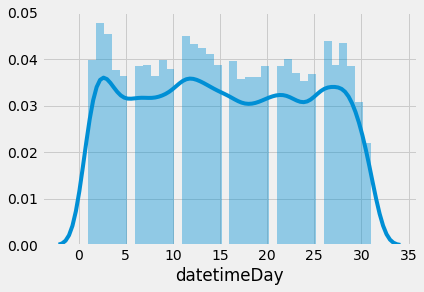

In [143]:
sns.distplot(df['datetimeDay'])

In [96]:
def dow(a):
    return str(a)
df['dayofweek'] = df['datetimeDayofweek'].apply(dow,1)

(44566, 64)
(44566, 64)


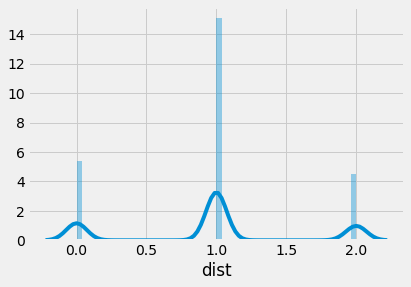

In [63]:
print(df.shape)
def dist(x):
    if x < 100:
        return 0
    elif x < 1000:
        return 1
    else:
        return 2
df['dist'] = df['Wert'].apply(dist,1)
print(df.shape)
sns.distplot(df['dist'])

In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
cols = ['48-lag','lat','long','weekend','humidity','datetimeElapsed']
cols += [ 'temp', 'temp_min', 'temp_max', 'temp-1', 'temp-2', 'temp-3', 'temp-8', 'temp-12', 'temp-18', 'temp-24','temp-std']
cols += [col for col in df.columns if 'Wert-' in col ]
print(cols)
df_lda = df[cols+['dist','dif','datetimeDayofweek','datetimeMonth','dayofweek','Wert','location','city','datetimeHour','datetimeDay']].dropna()
x, y  = df_lda[cols].to_numpy(), df_lda['dist'].to_numpy()
x_t = clf.fit(x, y).transform(x)
print(x_t.shape)

['48-lag', 'lat', 'long', 'weekend', 'humidity', 'datetimeElapsed', 'temp', 'temp_min', 'temp_max', 'temp-1', 'temp-2', 'temp-3', 'temp-8', 'temp-12', 'temp-18', 'temp-24', 'temp-std', 'Wert-47-lag', 'Wert-48-lag', 'Wert-49-lag', 'Wert-50-lag', 'Wert-60-lag']
(44066, 2)


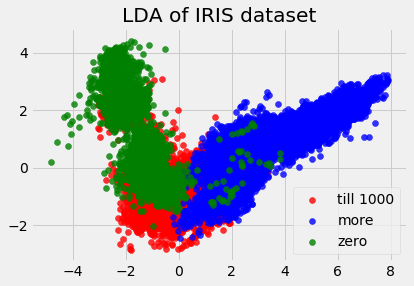

In [145]:

plt.figure()
for color, i, target_name in zip(['r','b','g'], [ 1, 2,0], ['till 1000','more','zero',]):
    plt.scatter(x_t[y == i, 0], x_t[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [146]:
df_lda['LDA-1'] = x_t[:,0]
df_lda['LDA-2'] = x_t[:,1]

In [147]:
test_idx = [idx for idx,day,month, elapse_day in zip(range(len(df_lda)),df_lda.datetimeDayofweek, df_lda.datetimeMonth, df_lda.datetimeElapsed) if (
    ( day == 6 &(np.random.rand()<.3)) 
    or
    ( day == 2&(np.random.rand()<.3) )
    or
    ( day == 5&(np.random.rand()<.1) )
    or 
    (month == 6 & elapse_day > 1560571200)
)] 
valid_idx = [idx for idx in range(len(df_lda)) if (np.random.rand()<float(.25)) & (idx not in test_idx)] 
train_idx = [idx for idx in range(len(df_lda)) if (idx not in valid_idx)& (idx not in test_idx)]

In [148]:
loc = df_lda['location']
daym = df_lda['datetimeDay']
print(len(valid_idx), len(df_lda), len(test_idx)/len(df_lda), len(valid_idx)/len(df_lda),len(train_idx)/len(df_lda))

9302 44066 0.1563109880633595 0.2110924522307448 0.6325965597058957


In [149]:

df_lda = pd.get_dummies(df_lda)
cols_dum = list(df_lda.columns) 
print(cols_dum)
cols_dum.remove('Wert')
cols_dum.remove('dif')
cols_dum.remove('datetimeDay')


['48-lag', 'lat', 'long', 'weekend', 'humidity', 'datetimeElapsed', 'temp', 'temp_min', 'temp_max', 'temp-1', 'temp-2', 'temp-3', 'temp-8', 'temp-12', 'temp-18', 'temp-24', 'temp-std', 'Wert-47-lag', 'Wert-48-lag', 'Wert-49-lag', 'Wert-50-lag', 'Wert-60-lag', 'dist', 'dif', 'datetimeDayofweek', 'datetimeMonth', 'Wert', 'datetimeHour', 'datetimeDay', 'LDA-1', 'LDA-2', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'location_Bottroper Weg', 'location_Flughafenstr. ', 'location_Joachim-Karnatz-Allee ', 'location_Lüttkamp ', 'location_Tharandter Str.', 'location_Triftstr. ', 'location_Wilhelmsburger Str. ', 'city_Berlin Tempelhof', 'city_Hamburg Fuhlsbuettel', 'city_Oschatz']


In [150]:
import xgboost as xgb

In [125]:
xgtrain = xgb.DMatrix(df_lda.iloc[train_idx,:][cols_dum].values, df_lda.iloc[train_idx,:].Wert.values, feature_names=cols_dum)
xgvalid = xgb.DMatrix(df_lda.iloc[valid_idx][cols_dum].values, df_lda.iloc[valid_idx,:].Wert.values, feature_names=cols_dum)
xgtest = xgb.DMatrix(df_lda.iloc[test_idx][cols_dum].values, feature_names=cols_dum)
xgall = xgb.DMatrix(df_lda[cols_dum].values, feature_names=cols_dum)

In [126]:
param = {'eta':.25,'gamma':1,'max_depth':9, 'objective':'reg:squarederror', 'verbose':3 ,'eval_metric':['rmse','mae']}
num_round = 1000
bst = xgb.train(param, xgtrain, num_round, verbose_eval=True, early_stopping_rounds=10,evals=[(xgvalid,'valid')])

[0]	valid-rmse:1040.52	valid-mae:531.179
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 10 rounds.
[1]	valid-rmse:787.011	valid-mae:399.773
[2]	valid-rmse:597.701	valid-mae:302.065
[3]	valid-rmse:456.142	valid-mae:229.603
[4]	valid-rmse:352.361	valid-mae:177.089
[5]	valid-rmse:276.571	valid-mae:139.003
[6]	valid-rmse:222.186	valid-mae:111.814
[7]	valid-rmse:183.328	valid-mae:92.8047
[8]	valid-rmse:156.779	valid-mae:79.9045
[9]	valid-rmse:139.029	valid-mae:71.0794
[10]	valid-rmse:128.054	valid-mae:65.2507
[11]	valid-rmse:120.927	valid-mae:61.2799
[12]	valid-rmse:116.589	valid-mae:58.5626
[13]	valid-rmse:113.659	valid-mae:56.6882
[14]	valid-rmse:111.99	valid-mae:55.4985
[15]	valid-rmse:110.851	valid-mae:54.677
[16]	valid-rmse:110.047	valid-mae:54.0574
[17]	valid-rmse:109.429	valid-mae:53.5392
[18]	valid-rmse:109.087	valid-mae:53.2168
[19]	valid-rmse:107.929	valid-mae:52.6369
[20]	valid-rmse:107.742	valid

In [127]:
# # make prediction
preds_train = bst.predict(xgtrain)
preds_val = bst.predict(xgvalid)
preds_test = bst.predict(xgtest)
preds_all = bst.predict(xgall)

bst

In [128]:
print(np.mean(abs(preds_train-df_lda.iloc[train_idx,:].Wert.values)))
print(np.mean(abs(preds_val-df_lda.iloc[valid_idx,:].Wert.values)))
print(np.mean(abs(preds_test-df_lda.iloc[test_idx,:].Wert.values)))

print(np.round(100-(np.mean(abs(preds_test-df_lda.iloc[test_idx,:].Wert.values))/np.mean(abs(df_lda.iloc[test_idx,:]['48-lag']-df_lda.iloc[test_idx,:].Wert)))*100,2),'%')

18.584468395882944
49.640970392313456
61.12257819913737
46.34 %


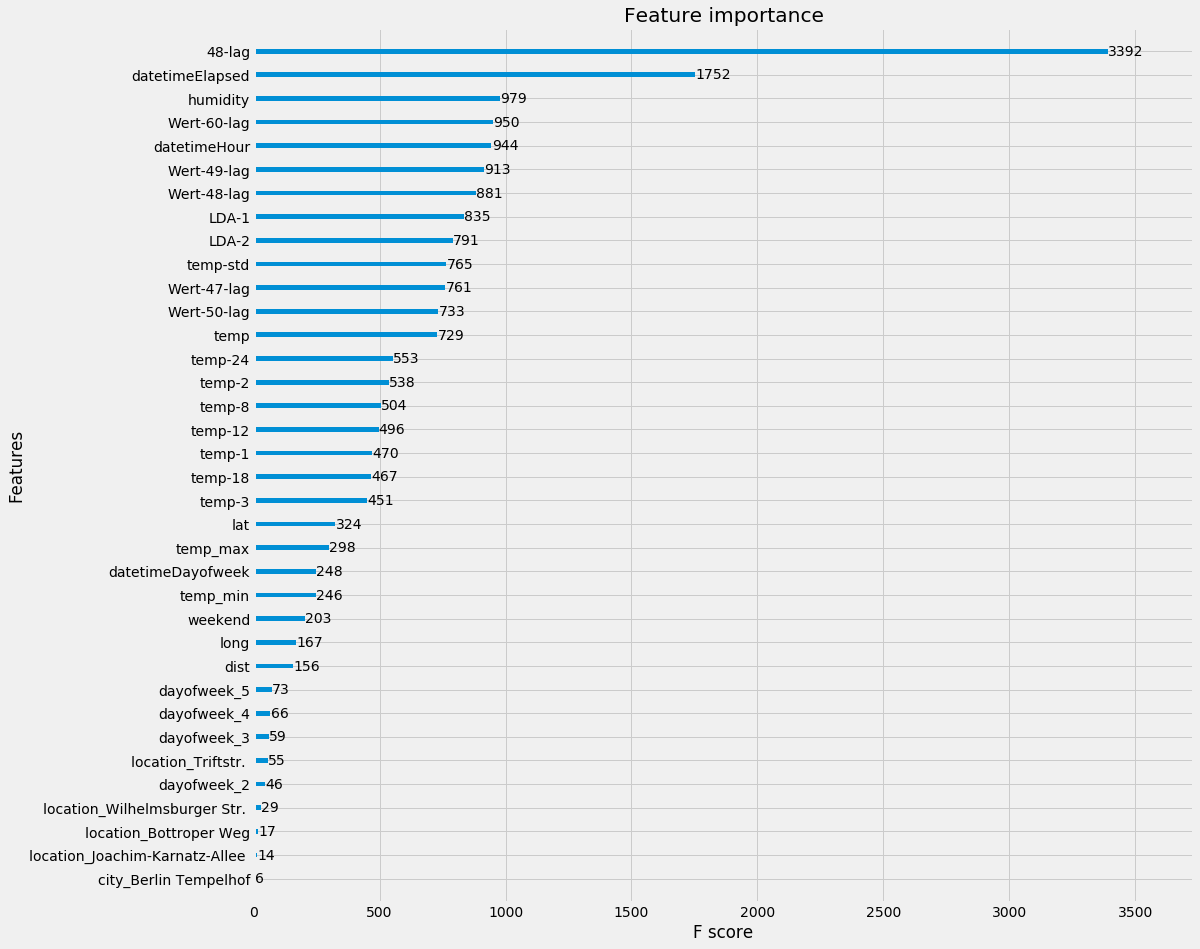

In [129]:
f, axs = plt.subplots(1,1,figsize=(15,15))
xgb.plot_importance(bst, ax = axs)

In [24]:
bst.save_model('xgboost_with_more_lag.model')

In [157]:
df_lda['preds'] = preds_all
df_lda['error'] = df_lda['preds'] - df['Wert']
df_lda['error_abs'] = abs(df_lda['preds'] - df['Wert'])
df_lda['loc'] = loc
set(df_lda['datetimeMonth'])

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [156]:
error = df_lda.groupby(['datetimeDayofweek','loc','datetimeDay','datetimeMonth']) \
    .mean()[['preds','Wert','48-lag','error','error_abs']]
e = error.sort_values('error_abs', ascending=False)
e.to_csv('errors.csv')
e.head(100)

preds  \
datetimeDayofweek loc                    datetimeDay datetimeMonth                
0                 Bottroper Weg          20          5              2023.825073   
                                         14          1              4706.582031   
3                 Bottroper Weg          10          1              4255.683105   
0                 Bottroper Weg          6           5              3550.068359   
                                         11          2              4939.070312   
                                         13          5              3274.540283   
                                         28          1              5407.312988   
                  Triftstr.              4           3              1027.710205   
                  Bottroper Weg          25          2              4640.220703   
                                         22          4              2724.705811   
                                         15          4              4026.475586   
                  Triftstr.              28          1              1509.206055   
                  Bottroper Weg          8           4              3015.851074   
                                         4           2              5555.347656   
                                                     3              4280.750977   
                                         27          5              2286.247314   
                                         21          1              5766.815918   
                                         11          3              4770.131836   
                                         29          4              3100.762695   
                                         1           4              3926.912598   
                  Triftstr.              4           2              1417.694214   
                  Bottroper Weg          2           9              1357.854614   
1                 Bottroper Weg          2           4              3809.196045   
0                 Lüttkamp               4           2               503.356079   
                  Bottroper Weg          25          3              4424.580078   
                                         17          6              1633.803467   
3                 Bottroper Weg          18          4              2922.819092   
                  Triftstr.              31          1              1228.960571   
0                 Bottroper Weg          5           8              1793.486328   
                                         22          7              1268.257690   
...                                                                         ...   
5                 Bottroper Weg          20          4              2707.977295   
4                 Bottroper Weg          17          5              3044.866943   
2                 Bottroper Weg          3           4              3320.338379   
                                         27          2              4245.039062   
1                 Bottroper Weg          12          3              4713.858887   
0                 Lüttkamp               14          1               460.086884   
6                 Bottroper Weg          17          3              4398.666992   
3                 Bottroper Weg          11          4              4106.744629   
1                 Lüttkamp               29          1               539.678650   
                  Bottroper Weg          19          2              4365.081055   
2                 Bottroper Weg          1           5              2940.992188   
1                 Lüttkamp               19          3               426.576813   
6                 Bottroper Weg          21          4              2666.724854   
4                 Lüttkamp               1           2               545.520935   
5                 Lüttkamp               11          5               298.059296   
6                 Bottroper Weg          10          3              4621.549805   
4      

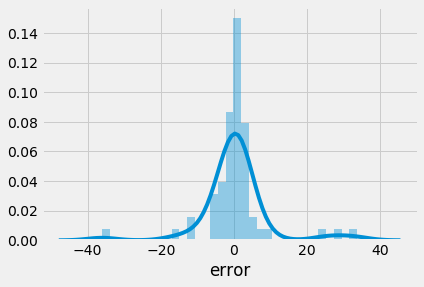

In [39]:
sns.distplot(error['error'])

In [139]:
sns.pairplot(df_lda['loc','error','error_abs','datetimeHour'])

KeyError: ('loc', 'error', 'error_abs', 'datetimeHour')